# DS 3000 Lab 2

Due: Tuesday May 20 in-class

### Submission Instructions
Upload this `ipynb` file to GitHub, and then to Gradescope.  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to GitHub and verify that the correct version is represented on Gradescope.

### Tips for success
- Collaborate: bounce ideas off of each other, if you are having trouble you can ask your classmates or Dr. Gerber for help with specific issues, however...
- [(See)](http://www.northeastern.edu/osccr/academic-integrity), i.e. you are welcome to **talk about/discuss** (*not* show or allow each other to copy your answers to) the problems.

In [2]:
# you may want to use the below modules on this lab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from bs4 import BeautifulSoup
from itertools import zip_longest
import re

# Web Scraping EuroMillions Results

For this problem, we will (together) create a small data set scraped from [Euro-Millions](https://www.euro-millions.com/) which is a lottery that is played across nine European countries. Draws take place on Tuesday and Friday evenings with a minimum guaranteed jackpot of â‚¬17 million.

## Part 1: The Scraper Function (20 points)

Complete the function `get_lottery_html()` below (including docstring) which visits the lottery results for a specific date and grabs the html. Visit [the website](https://www.euro-millions.com/results/) to select a date or two and notice the pattern in the url so that you can pass any date to the function as a string. 

**Make sure to remove the `pass` statement when you are finished**. I have written the code you should run once the function is completed, getting the lottery results from the last day in April.

In [34]:
def get_lottery_html(code):
    '''
    Takes a date and returns the html for a lottery website on that date
    code: string representing the date
    returns: data, html string
    '''
    
    url = f"https://www.euro-millions.com/results/{code}"
    data = requests.get(url).text
    return data
    



In [35]:
# when you are done the following code should be run
url_text = get_lottery_html('29-04-2025')
url_text

'\r\n<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n\r\n\t<title>EuroMillions Results for Tuesday 29th April 2025 - Draw 1837</title>\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n\t<meta name="description" content="View the EuroMillions results including prize breakdown, HotPicks numbers and Millionaire Maker codes for Tuesday 29th April 2025.">\r\n\t<meta name="keywords" content="euromillions results 29-04-2025, 29th april 2025, draw number 1837">\r\n\t<meta name="author" content="Euro-Millions.com">\r\n\t<meta name="format-detection" content="telephone=no">\r\n\t<meta name="HandheldFriendly" content="True">\r\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\r\n\t\r\n\t<link rel="alternate" hreflang="x-default" href="https://www.euro-millions.com/results/29-04-2025">\r\n<link rel="alternate" hreflang="fr" href="https://www.euro-millions.com/fr/resultats/29-04-2025">\r\n<link rel="alternate" hreflang="de-AT" href="https://www.euro

## Part 2: The Soup Function (20 points)

Complete the function `get_country_soup()` below (including docstring) which takes the html from the previous function and outputs one of nine beautiful soup objects, depending on the country you are interested in as defined by the `'id'` attribute:

    - `id='PrizeAT'` (Austria)
    - `id='PrizeBE'` (Belgium)
    - `id='PrizeFR'` (France)
    - `id='PrizeIE'` (Ireland)
    - `id='PrizeLU'` (Luxembourg)
    - `id='PrizePT'` (Portugal)
    - `id='PrizeES'` (Spain)
    - `id='PrizeCH'` (Switzerland)
    - `id='PrizeGB'` (UK)
    
The function should take two arguments: the html object from `get_lottery_html()` and a string that specifies the `id` you are interested in (by default, Belgium or `BE`).
    
**Make sure to remove the `pass` statement when you are finished.** Then, also make sure to run the code to ensure your function works.

In [30]:
def get_country_soup(html, country):
    '''
    html: a string of html
    country: a string representing a country code
    returns an bs4 element as a string
    '''
    
    
    
    soup = BeautifulSoup(html, "html.parser")
    element = soup.find(id=f"Prize{country}")
    return element


In [31]:
# when you are done the following code should be run (feel free to change the country if you wish)
country_choice = 'BE'
my_country_soup = get_country_soup(url_text, country_choice)
my_country_soup

<div id="PrizeBE">
<table class="mobFormat">
<thead>
<tr>
<th>Numbers Matched</th>
<th class="righty">Prize Per Winner</th>
<th class="righty">Belgian Winners</th>
<th class="righty">Prize Fund Amount</th>
<th class="righty">Total Winners</th>
</tr>
</thead>
<tbody>
<tr>
<td class="colour" data-title="Numbers Matched">
<span class="prizeName"><span class="ball">5 </span> + <span class="star"> 2</span></span>
</td>
<td class="righty" data-title="Prize Per Winner">
											€83,786,486.80
											
										</td>
<td class="righty" data-title="Belgian Winners">
												0
												
											</td>
<td class="righty" data-title="Prize Fund Amount">
												€0.00
												
											</td>
<td class="righty" data-title="Total Winners">
<strong style="color:#F00">Rollover!</strong> 
												0
												
										</td>
</tr>
<tr>
<td class="colour" data-title="Numbers Matched">
<span class="prizeName"><span class="ball">5 </span> + <span class="star"> 1</span></span

## Part 3: Cleaning a Country (20 points)

Below is the function `clean_country_df()`, which takes the soup object from the previous function and creates a data frame with the following columns:

    - `balls`: the number of balls matched
    - `stars`: the number of stars matched
    - `ppw`: the prize per winner
    - `country_winners`: how many winners of the prize in the given country
    - `total_winners`: the total number of winners
    - `country`: the country name
    - `currency`: the currency of the lottery

I have written the function and (*given your function from Part 2 works*) it should work. **DO NOT CHANGE ANYTHING IN THE BODY OF THE FUNCTION.**

**In a markdown cell** create a bullet point list where you explain each what each chunk of code does. Your bullet point list should have **THREE** sections, with **NINE** total bullet points/explanations corresponding to the chunks below the `# EXPLAIN THIS (number)` comments. You must accurately summarize the content of each code chunk. **Talking to your neighbors/group about this is highly recommended.**

In [24]:
def clean_country_df(soup, country_name):
    """Takes the soup of a country and cleans it, creating a data frame.
    
    Args:
        soup (soup): the soup from get_country_soup
        country_name (str): name of the country (make sure this matches with the code used in the previous part)
            ** Attention: The country_name must match the country_choice used to create the soup
    Returns:
        clean_country_df (DataFrame): a DataFrame with seven columns corresponding to
            balls matched
            stars matched
            prize per winner
            country winners
            total winners
            country
            currency
    """
    # EXPLAIN THIS (1.1)
    table = soup.find('table')

    # EXPLAIN THIS (1.2)
    headers = [th.get_text(strip=True) for th in table.find('thead').find_all('th')]

    # EXPLAIN THIS (1.3)
    country_winner_index = next((i for i, header in enumerate(headers) if 'Winners' in header and 'Total' not in header), None)

    # EXPLAIN THIS (1.4)
    balls_matched = []
    stars_matched = []
    prize_per_winner = []
    country_winners = []
    total_winners = []
    currencies = []
    
    # Process each row in the table body, excluding the last totals row
    for row in table.find('tbody').find_all('tr')[:-1]:
        columns = row.find_all('td')
        
        # EXPLAIN THIS (2.1)
        numbers_matched = columns[0].get_text(strip=True)
        prize = columns[1].get_text(strip=True)
        country_winner = columns[country_winner_index].get_text(strip=True) if country_winner_index is not None else 'N/A'
        total_winner = columns[-1].get_text(strip=True)
        
        # EXPLAIN THIS (2.2)
        currency_match = re.match(r'^\D*', prize)
        currency = currency_match.group(0) if currency_match else 'N/A'
        currencies.append(currency)
        
        # EXPLAIN THIS (2.3)
        numeric_prize = pd.to_numeric(prize.replace(currency, '').replace(',', ''), errors='coerce')
        
        # EXPLAIN THIS (2.4)
        numbers_split = numbers_matched.split('+')
        balls = pd.to_numeric(numbers_split[0].strip().replace(',', ''), errors='coerce')
        stars = pd.to_numeric(numbers_split[1].strip().replace(',', ''), errors='coerce') if len(numbers_split) > 1 else 0

        balls_matched.append(balls)
        stars_matched.append(stars)
        prize_per_winner.append(numeric_prize)
        country_winners.append(pd.to_numeric(country_winner.replace(',', ''), errors='coerce'))
        total_winners.append(pd.to_numeric(total_winner.replace(',', ''), errors='coerce'))
    
    # EXPLAIN THIS (3)
    data = {
        'balls': balls_matched,
        'stars': stars_matched,
        'ppw': prize_per_winner,
        'country_winners': country_winners,
        'total_winners': total_winners,
        'country': [country_name] * len(balls_matched),
        'currency': currencies
    }
    
    clean_country_df = pd.DataFrame(data)
    
    return clean_country_df

# Example usage
clean_df = clean_country_df(my_country_soup, 'BE')
clean_df

,balls,stars,ppw,country_winners,total_winners,country,currency
0,5,2,83786486.8,0,NaN,BE,€
1,5,1,0.0,0,0.0,BE,€
2,5,0,65420.2,3,11.0,BE,€
3,4,2,1326.9,4,32.0,BE,€
4,4,1,129.2,54,605.0,BE,€
5,3,2,71.5,107,1156.0,BE,€
6,4,0,38.6,107,1502.0,BE,€
7,2,2,17.2,1301,16848.0,BE,€
8,3,1,12.5,1904,25854.0,BE,€
9,3,0,8.9,4780,67339.0,BE,€


Your answer in this cell:
- Explain Code Chunks 1:
  
    - finds the table object inside the bs4 object from the second func
    - finds all the table headers as they are all th selectors inside a thead selector
    - finds the first winner inside the winners list to avoid selecting 
    - initializes the table lists to append to the df later
- Explain Code Chunks 2:
  
    -Gets the winner data and prize data from each table
    - utilizes regex to figure out the currency so that it can standardize all currencies
    - converts the prize amount to numeric values
    - adds the future dataframe values to their respective lists and converting them to numeric where necessary, and removes commas from ball lists
- Explain Code Chunk 3:

    -creates the dataframes out of the different attributes and creates a country item in the list for each row. 

## Part 4: Stacking the Countries (20 points)

Complete the function `stack_countries_df()` below (including docstring) which takes as an argument a list of country codes (strings) and a list of dates (strings), and uses the functions from the previous three parts to create a single data frame with results across those countries and dates. There may be multiple ways to do this, but one way could be to first loop through the dates, use the `get_lottery_html()` function, then loop through the countries and apply the other two functions. You will also want to add a column with the date information to the final data frame.

**Make sure to remove the `pass` statement when you are finished.** Then, also make sure to run the code to ensure your function works.

In [72]:
def stack_countries_df(country_list, date_list):
    '''
    combines all the dataframes for each country on each date into one
    country_list: a list of country code stirngs
    date_list: a list of date strings
    returns: final_df, a df containing all of the countries data on each date
    '''
    df_list = []
    for date in date_list:
        html = get_lottery_html(date)
        for country in country_list:
            element = get_country_soup(html, country)
            df = clean_country_df(element, country)
            df['date'] = date
            df_list.append(df)
    final_df = df_list[0]
    
    for df in df_list[1:]:
        final_df = pd.concat([df,final_df], axis=0)
               
            
    return final_df
        
    
    
    

In [108]:
country_codes = ['BE', 'GB', 'CH']
dates = ['25-04-2025', '29-04-2025']
combined_df = stack_countries_df(country_codes, dates)


## Part 5: EDA and Data Viz (20 points)

The first code cell below runs your function from part 4 to get the lottery results for Belgium and France over the month of April 2025. Use this data frame to:

- Create a subset which contains only the 4 ball, 0 star winners
- Plot a line plot that compares the number of 4 ball, 0 star winners for in Belgium and France over April

**Then, in a markdown cell** discuss briefly what this plot tells you, if anything.

In [150]:
country_codes = ['BE', 'FR']
dates = ['01-04-2025', '04-04-2025', '08-04-2025', 
         '11-04-2025', '15-04-2025', '18-04-2025', 
         '22-04-2025', '25-04-2025', '29-04-2025']
combined_df = stack_countries_df(country_codes, dates)

In [151]:
combined_df

,balls,stars,ppw,country_winners,total_winners,country,currency,date
0,5,2.0,83786486.8,0,NaN,FR,€,29-04-2025
1,5,1.0,0.0,0,0.0,FR,€,29-04-2025
2,5,NaN,0.0,0,0.0,FR,€,29-04-2025
3,5,0.0,65420.2,2,11.0,FR,€,29-04-2025
4,4,2.0,1326.9,7,32.0,FR,€,29-04-2025
...,...,...,...,...,...,...,...,...
8,3,1.0,14.0,1414,21031.0,BE,€,01-04-2025
9,3,0.0,10.6,3425,51822.0,BE,€,01-04-2025
10,1,2.0,8.6,6050,77262.0,BE,€,01-04-2025
11,2,1.0,6.5,22277,320432.0,BE,€,01-04-2025


In [152]:
subset = combined_df[['country', 'balls', 'stars', 'date', 'country_winners']][(combined_df['balls'] == 4) & (combined_df['stars'] == 0)]
subset.shape

(18, 5)

Text(0.5, 1.0, '0 star 4 ball wins across Belgium and France')

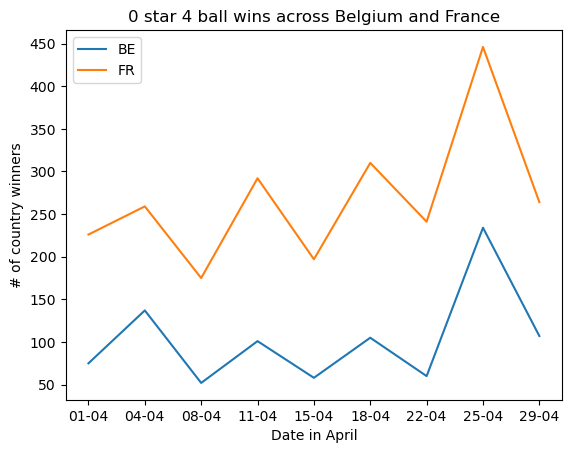

In [169]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date

subset = subset.iloc[::-1]


belgium = subset[subset['country'] == "BE"]
france = subset[subset['country'] == "FR"]
belgium_dates = belgium['date'].tolist()
belgium_wins = belgium['country_winners'].tolist()
france_dates = france['date'].tolist()
france_wins = france['country_winners'].tolist()

for i in range(len(belgium_dates)):
    belgium_dates[i] = belgium_dates[i][0:-5]

for i in range(len(france_dates)):
    france_dates[i] = france_dates[i][0:-5]
    

plt.plot(belgium_dates,belgium_wins, label ="BE")
plt.plot(france_dates,france_wins, label = "FR")

plt.legend()
plt.xlabel('Date in April')
plt.ylabel('# of country winners')

plt.title('0 star 4 ball wins across Belgium and France')





### France received a higher amount of winners across EVERY date for which the winners won with 4 balls and 0 stars